# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'C:\\Users\\meagv\\Google Drive\\Springboard Data Science\\Guided Capstone'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('step3_output.csv')
X=df.drop(['Name','AdultWeekend','state','summit_elev', 'Unnamed: 0'], axis=1)
y=df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
coeff=(pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False))
print(coeff)
coeff.to_csv('finalcoefficients.csv')
print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

print(X_test.shape)

                   Coefficient
AdultWeekday         20.077469
clusters              2.638486
vertical_drop         2.032411
Runs                  1.398631
triple                1.387036
surface               1.249047
quad                  1.183929
daysOpenLastYear      1.156668
averageSnowfall       0.899505
fastQuads             0.705187
projectedDaysOpen     0.585124
Snow Making_ac        0.584563
total_chairs          0.571702
LongestRun_mi         0.403842
fastSixes             0.383018
NightSkiing_ac        0.381768
trams                 0.290860
double                0.246858
yearsOpen             0.242682
SkiableTerrain_ac     0.141560
TerrainParks          0.092517
fastEight             0.060005
0.9354012974977128
5.1303455279734145
(83, 22)


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [3]:
big=df[df['Name'].str.contains('Big Mountain')]

In [4]:
X=big.drop(['Name','AdultWeekend','clusters','state','summit_elev'], axis=1)


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [5]:
X=big.drop(['Name','AdultWeekend','clusters','state','summit_elev', 'Unnamed: 0'], axis=1)

print(X)
X=pd.DataFrame(X)
print(X)

     vertical_drop  trams  fastEight  fastSixes  fastQuads  quad  triple  \
151           2353      0        0.0          0          3     2       6   

     double  surface  total_chairs  ...  TerrainParks  LongestRun_mi  \
151       0        3            14  ...           4.0            3.3   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
151             3000.0           600.0             123.0       72.0   

     averageSnowfall  AdultWeekday  projectedDaysOpen  NightSkiing_ac  
151            333.0          81.0              123.0           600.0  

[1 rows x 21 columns]
     vertical_drop  trams  fastEight  fastSixes  fastQuads  quad  triple  \
151           2353      0        0.0          0          3     2       6   

     double  surface  total_chairs  ...  TerrainParks  LongestRun_mi  \
151       0        3            14  ...           4.0            3.3   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
151             3000.0 

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [6]:
from sklearn.datasets import make_regression
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
X_scaled.shape
Xnew, _ = make_regression(n_samples=1, n_features=22, noise=0.1, random_state=1)

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [7]:
ynew = model.predict(Xnew)
print(ynew)

[92.19979559]


In [8]:
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
    
    

X=[-1.09989127 -1.10061918  1.14472371  1.13376944 -2.06014071  0.04221375
 -0.61175641 -0.87785842 -0.17242821 -1.07296862 -0.3224172  -0.24937038
 -0.38405435 -0.7612069   1.46210794 -0.52817175  1.62434536  0.3190391
  1.74481176  0.58281521 -2.3015387   0.86540763], Predicted=92.19979559085834


In [9]:
big=df[df['Name'].str.contains('Big Mountain')]
big['AdultWeekend']

151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

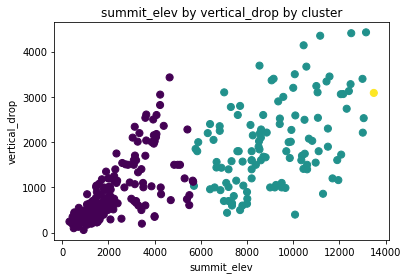

In [10]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')

plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

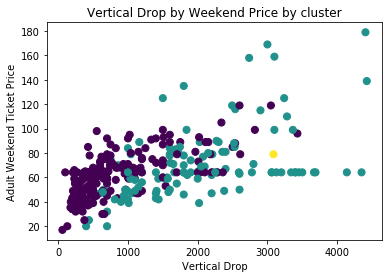

In [11]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')

plt.xlabel('Vertical Drop')
plt.ylabel('Adult Weekend Ticket Price')
plt.title('Vertical Drop by Weekend Price by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

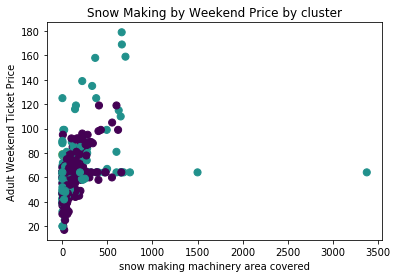

In [12]:
plt.scatter(df['Snow Making_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')

plt.xlabel('snow making machinery area covered')
plt.ylabel('Adult Weekend Ticket Price')
plt.title('Snow Making by Weekend Price by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

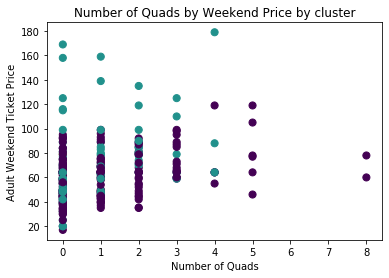

In [13]:
plt.scatter(df['quad'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')

plt.xlabel('Number of Quads')
plt.ylabel('Adult Weekend Ticket Price')
plt.title('Number of Quads by Weekend Price by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [14]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [15]:
co=pd.read_csv('finalcoefficients.csv')

In [16]:
print(co)
co.columns=['Feature', 'Coefficient']
co['Explained Variance']= ""
co['Mean Absolute Error']=""
co=co.append({'Explained Variance':0.9354012974977128, 'Mean Absolute Error': 5.1303455279734145}, ignore_index=True)
co.fillna('', inplace=True)

co



           Unnamed: 0  Coefficient
0        AdultWeekday    20.077469
1            clusters     2.638486
2       vertical_drop     2.032411
3                Runs     1.398631
4              triple     1.387036
5             surface     1.249047
6                quad     1.183929
7    daysOpenLastYear     1.156668
8     averageSnowfall     0.899505
9           fastQuads     0.705187
10  projectedDaysOpen     0.585124
11     Snow Making_ac     0.584563
12       total_chairs     0.571702
13      LongestRun_mi     0.403842
14          fastSixes     0.383018
15     NightSkiing_ac     0.381768
16              trams     0.290860
17             double     0.246858
18          yearsOpen     0.242682
19  SkiableTerrain_ac     0.141560
20       TerrainParks     0.092517
21          fastEight     0.060005


,Feature,Coefficient,Explained Variance,Mean Absolute Error
0,AdultWeekday,20.0775,,
1,clusters,2.63849,,
2,vertical_drop,2.03241,,
3,Runs,1.39863,,
4,triple,1.38704,,
5,surface,1.24905,,
6,quad,1.18393,,
7,daysOpenLastYear,1.15667,,
8,averageSnowfall,0.899505,,
9,fastQuads,0.705187,,


In [17]:
co.to_csv('finaltable1.csv')